In [2]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"]="-1"  

import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,  MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model
import numpy as np

Using TensorFlow backend.


In [3]:
physical_devices = tf.config.list_physical_devices('GPU') 
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True) 
    tf.config.log_device_placement = True  # to log device placement (on which device the operation ran)
except: 
    print("not")

not


In [4]:
data = ImageDataGenerator()
traindata = data.flow_from_directory(directory="..\\data\\imgs\\train",target_size=(224, 224))
testdata = data.flow_from_directory(directory="..\\data\\imgs\\test", target_size=(224, 224))
validationdata = data.flow_from_directory(directory="..\\data\\imgs\\validation", target_size=(224, 224))

Found 22424 images belonging to 10 classes.
Found 22424 images belonging to 10 classes.
Found 22424 images belonging to 10 classes.


In [5]:
model = Sequential()

model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=4096,activation="relu"))

model.add(Dense(units=4096,activation="relu"))

model.add(Dense(units=10, activation="softmax"))

In [5]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(224, 224 ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10)
])

In [6]:
# Adam compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 256)      

In [12]:
model.fit(traindata, 
          epochs = 10,
          steps_per_epoch = 2, 
          validation_steps = 2,
          validation_data = validationdata)

Epoch 1/10
2/2 [==============================] - 66s 33s/step - loss: 1189.9039 - accuracy: 0.0625 - val_loss: 2.3580 - val_accuracy: 0.0781
Epoch 2/10
2/2 [==============================] - 63s 32s/step - loss: 2.3153 - accuracy: 0.0938 - val_loss: 2.3170 - val_accuracy: 0.1250
Epoch 3/10
2/2 [==============================] - 63s 32s/step - loss: 2.3287 - accuracy: 0.0625 - val_loss: 2.2919 - val_accuracy: 0.0781
Epoch 4/10
2/2 [==============================] - 59s 29s/step - loss: 2.2959 - accuracy: 0.1719 - val_loss: 2.2847 - val_accuracy: 0.0625
Epoch 5/10
2/2 [==============================] - 59s 29s/step - loss: 2.2831 - accuracy: 0.1719 - val_loss: 2.3138 - val_accuracy: 0.1406
Epoch 6/10
2/2 [==============================] - 60s 30s/step - loss: 2.3581 - accuracy: 0.0938 - val_loss: 3.5203 - val_accuracy: 0.0312
Epoch 7/10
2/2 [==============================] - 61s 31s/step - loss: 2.5218 - accuracy: 0.1562 - val_loss: 2.2995 - val_accuracy: 0.0938
Epoch 8/10
2/2 [========

In [15]:
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=50, verbose=1, mode='auto')
print("ready")

ready


In [ ]:
hist = model.fit_generator(
    traindata,
    steps_per_epoch= 16,
    epochs=100,
    validation_data=validationdata,
    validation_steps=8,
    callbacks=[checkpoint,early]
)

Epoch 1/100
16/16 [==============================] - 60792s 3799s/step - loss: 2.3010 - accuracy: 0.0957 - val_loss: 2.2887 - val_accuracy: 0.1094

Epoch 00001: val_accuracy improved from -inf to 0.10938, saving model to vgg16_1.h5
Epoch 2/100
16/16 [==============================] - 358s 22s/step - loss: 2.2991 - accuracy: 0.1133 - val_loss: 2.2864 - val_accuracy: 0.1094

Epoch 00002: val_accuracy did not improve from 0.10938
Epoch 3/100
16/16 [==============================] - 389s 24s/step - loss: 2.3022 - accuracy: 0.1074 - val_loss: 2.2890 - val_accuracy: 0.1289

Epoch 00003: val_accuracy improved from 0.10938 to 0.12891, saving model to vgg16_1.h5
Epoch 4/100
16/16 [==============================] - 383s 24s/step - loss: 2.3045 - accuracy: 0.1230 - val_loss: 2.2982 - val_accuracy: 0.1289

Epoch 00004: val_accuracy did not improve from 0.12891
Epoch 5/100
16/16 [==============================] - 387s 24s/step - loss: 2.2994 - accuracy: 0.0957 - val_loss: 2.2986 - val_accuracy: 0.1

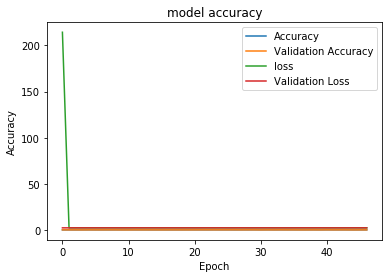

In [10]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

[[0.10622618 0.10340764 0.10393331 0.10687024 0.09961893 0.10394603
  0.09879901 0.09371146 0.08528571 0.09820154]]


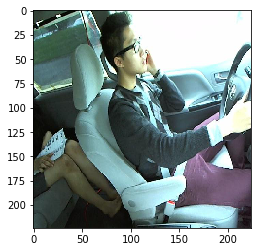

In [14]:
img = image.load_img("..\\data\\imgs\\test\\img_38.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
print(output)